----------------------
#### Loss functions - TF/Keras
-----------------

In [99]:
from IPython.display import Image

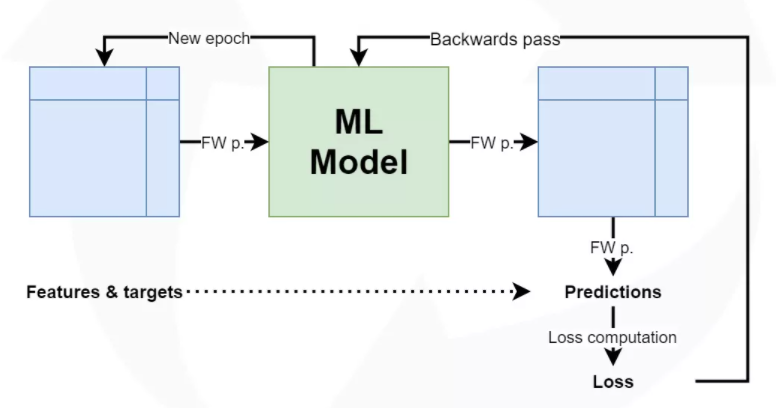

In [100]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\loss-fn-00.PNG', width=600)

#### Forward pass
- `features` and `targets` -> `dataset`. 
    - split into 3 parts before the training process starts: 
        - `training` data, `validation` data and `testing` data. 
            - The training data is used during the `training process`; more specificially, to generate predictions during the forward pass. 
            - However, after each training cycle, the predictive performance of the model must be tested. This is what the `validation` data is used for – it helps during model optimization.

            - testing data - allows us to tell something about the generalization power of our machine learning model.

            - The training data is fed into the machine learning model in what is called the `forward pass`. 
                - The end result is a set of predictions, one per sample. 
                    - This means that when my training set consists of 1000 feature vectors (or rows with features) that are accompanied by 1000 targets, we will have 1000 predictions after the forward pass.

#### Loss
- You do however want to know `how well the model` performs with respect to the `targets` originally set. 
- This is where the concept of `loss` enters the equation.

    - Most generally speaking, the loss allows us to compare between some `actual` targets and `predicted` targets. 
        - It does so by imposing a `cost` (or, using a different term, a `loss`) on each prediction if it deviates from the actual targets.

#### Backwards pass
- When loss is computed, the model must be improved. 
    - This is done by propagating the error backwards to the model structure, such as the model’s weights. This closes the learning cycle between feeding data forward, generating predictions, and improving it – by adapting the weights, the model likely improves (sometimes much, sometimes slightly) and hence `learning` takes place.

- Depending on the model type used, there are many ways for optimizing the model, i.e. propagating the error backwards. In neural networks, often, a combination of gradient descent based methods and backpropagation is used: gradient descent like optimizers for computing the gradient or the direction in which to optimize, backpropagation for the actual error propagation.

In other model types, such as Support Vector Machines, we do not actually propagate the error backward, strictly speaking. However, we use methods such as quadratic optimization to find the mathematical optimum, which given linear separability of your data (whether in regular space or kernel space) must exist. However, visualizing it as “adapting the weights by computing some error” benefits understanding. Next up – the loss functions we can actually use for computing the error!

In Keras, loss functions are passed `during` the `compile stage` 

In [1]:
# Import libraries for data wrangling, preprocessing and visualization
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read data file
data = pd.read_csv(r"D:\MYLEARN\DATASETS\breast-cancer-data.csv")

In [3]:
data.shape

(569, 33)

In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# Column Unnamed : 32 holds only null values, so it is of no use to us. We simply drop that column.
data.drop("Unnamed: 32",axis=1,inplace=True)
data.drop("id", axis=1, inplace=True)

In [6]:
# Select the columns to use for prediction in the neural network
prediction_var = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

X = data[prediction_var].values
y = data.diagnosis.values

In [8]:
y[:10]

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M'], dtype=object)

In [9]:
np.unique(y, return_counts= True)

(array(['B', 'M'], dtype=object), array([357, 212], dtype=int64))

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# Diagnosis values are strings. Changing them into numerical values using LabelEncoder.
encoder = LabelEncoder()
encoder.fit(y)

encoded_y = encoder.transform(y)

#### define NN model

In [12]:
def create_baseline():
    # create model
    model = Sequential()
    
    model.add(Dense(10, input_dim=30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1,                kernel_initializer='normal', activation='sigmoid'))
    
    # Compile model. 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#### The KerasClassifier class
This is the special wrapper class from Keras than enmeshes the Scikit-learn classifier API with Keras parametric models. We can pass on various model parameters corresponding to the create_model function, and other hyperparameters like epochs, and batch size to this class.

In [15]:
from keras.wrappers.scikit_learn import KerasClassifier

from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler

In [16]:
# Evaluate model using standardized dataset. 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn  =create_baseline, 
                                          epochs    =100, 
                                          batch_size=5, 
                                          verbose   =0)))

C:\Users\v-bsinha\AppData\Local\Temp/ipykernel_8552/4236555091.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  estimators.append(('mlp', KerasClassifier(build_fn  =create_baseline,


In [17]:
estimators

[('standardize', StandardScaler()),
 ('mlp', <keras.wrappers.scikit_learn.KerasClassifier at 0x1d4c06018b0>)]

#### create pipeline

In [18]:
from sklearn.pipeline import Pipeline

In [19]:
pipeline = Pipeline(estimators)

#### define KFold splits and run the cross val score

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

In [21]:
%%time
kfold   = StratifiedKFold(n_splits=3, shuffle=True)

results = cross_val_score(pipeline, 
                          X, 
                          encoded_y, 
                          cv=kfold)

print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 96.66% (1.51%)
Wall time: 33.1 s


#### tf.keras.losses

|Classes                       | Description                                                     |
|------------------------------|-----------------------------------------------------------------|
|**BinaryCrossentropy** |Computes the cross-entropy loss between true labels and predicted labels.|
|**CategoricalCrossentropy**|Computes the crossentropy loss between the labels and predictions.|
| CategoricalHinge: |Computes the categorical hinge loss between y_true and y_pred.|
| CosineSimilarity: |Computes the cosine similarity between labels and predictions.|
| Hinge: |Computes the hinge loss between y_true and y_pred.|
| Huber: |Computes the Huber loss between y_true and y_pred.|
|**KLDivergence** |Computes Kullback-Leibler divergence loss between y_true and y_pred.|
| LogCosh: |Computes the logarithm of the hyperbolic cosine of the prediction error.|
| Loss: |Loss base class.|
| **MeanAbsoluteError** |Computes the mean of absolute difference between labels and predictions.|
| **MeanAbsolutePercentageError** |Computes the mean absolute percentage error between y_true and y_pred.|
| **MeanSquaredError** |Computes the mean of squares of errors between labels and predictions.|
| MeanSquaredLogarithmicError: |Computes the mean squared logarithmic error between y_true and y_pred.|
| Poisson: |Computes the Poisson loss between y_true and y_pred.
| Reduction: Types of loss reduction.|
| **SparseCategoricalCrossentropy** |Computes the crossentropy loss between the labels and predictions.|
| SquaredHinge: |Computes the squared hinge loss between y_true and y_pred.|

-------------------------------
#### Binary Cross Entropy
--------------------------------
- The Binary Cross entropy will calculate the cross-entropy loss between the predicted classes and the true classes. 

- By default, the `sum_over_batch_size` reduction is used. This means that the loss will return the average of the per-sample losses in the batch.

In [22]:
import tensorflow as tf

seed = 5
np.random.seed(seed)

In [23]:
y_true = [[0.,  1.],  [0.2, 0.8],[0.3, 0.7],[0.4, 0.6]]
y_pred = [[0.6, 0.4], [0.4, 0.6],[0.6, 0.4],[0.8, 0.2]]

bce = tf.keras.losses.BinaryCrossentropy(reduction='sum_over_batch_size')

bce(y_true, y_pred).numpy()

0.83944494

#### Usage -  `binary cross entropy`

In [24]:
tf.keras.losses.BinaryCrossentropy(
    from_logits    =False,
    label_smoothing=0.0,
    axis           =-1,
    reduction      ="auto",
    name           ="binary_crossentropy",
)

- Computes the `cross-entropy loss` between `true` labels and `predicted` labels.

- The loss function requires the following inputs:

    - `y_true` (true label): This is either 0 or 1.
    - `y_pred` (predicted value): This is the model's prediction, i.e, a single floating-point value which either represents
        - a `logit`,      (i.e, value in [-inf, inf] when `from_logits=True`) or 
        - a `probability` (i.e, value in [0., 1.]    when `from_logits=False`).

##### 1. With tf.keras API:



##### 2. As a standalone function:

In [25]:
# Example 1: (batch_size = 1, number of samples = 4)
y_true = [0,     1,    0,     0]
y_pred = [-18.6, 0.51, 2.94, -12.8]

bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)

bce(y_true, y_pred).numpy()

0.865458

In [26]:
# Example 2: (batch_size = 2, number of samples = 4)
y_true = [[0, 1], 
          [0, 0]]

# Using default 'auto'/'sum_over_batch_size' reduction type.
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)

y_pred = [[-18.6, 0.51], 
          [2.94, -12.8]]

bce(y_true, y_pred).numpy()

0.865458

#### Default Usage: (set from_logits=False)



In [24]:
# 1. Set `from_logits=False`
bce = tf.keras.losses.BinaryCrossentropy() # OR ...('from_logits=False')

y_true = [0,     1,    0,     0]

# 2. Update `y_pred` to use probabilities instead of logits
y_pred = [0.6, 0.3, 0.2, 0.8] # OR [[0.6, 0.3], [0.2, 0.8]]

bce(y_true, y_pred).numpy()

0.9882109

#### One more example - BCE

We use two simple datasets today 
- a `circles` dataset for the `binary classification` problem and 
- a `clusters` dataset for the `multiclass` one.

In [27]:
from sklearn.datasets import make_circles

In [29]:
# Configuration options
num_samples_total = 1000
training_split    =  250

# Generate data
X, y = make_circles(n_samples = num_samples_total, factor=0.1)

X_train = X[training_split:, :]
X_test  = X[:training_split, :]

y_train = y[training_split:]
y_test  = y[:training_split]

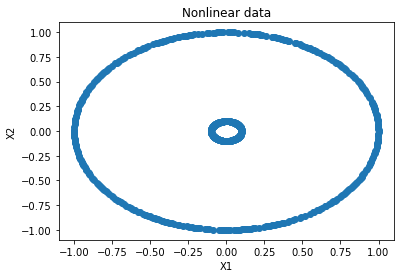

In [30]:
# Generate scatter plot for training data
plt.scatter(X_train[:,0], 
            X_train[:,1])

plt.title('Nonlinear data')
plt.xlabel('X1')
plt.ylabel('X2');

#### Model architecture & configuration

In [31]:
# Set the input shape
feature_vector_shape = len(X_train[0])
feature_vector_shape

2

In [32]:
input_shape = (feature_vector_shape,)
input_shape

(2,)

we’ll use a one-dimensional feature vector with a shape of (2, ) – one dimension, two elements in that dimension (the X and Y values represented in the visualization above).

In [36]:
# Create the model
model = Sequential()

model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(1, activation='sigmoid'))

The final layer has just one output neuron, which produces one value – indeed, that prediction between zero and one. 

The Sigmoid function is capable of producing this output: with a range of (0, 1), it converts any input to a value in that interval. We now have an architecture that allows us to separate two classes. 

In [37]:
loss_function_used  = tf.keras.losses.BinaryCrossentropy()

In [38]:
loss_function_used.get_config()

{'reduction': 'auto',
 'name': 'binary_crossentropy',
 'from_logits': False,
 'label_smoothing': 0.0,
 'axis': -1}

In [39]:
%%time
# Configure the model and start training
model.compile(loss      = loss_function_used, 
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics   = ['accuracy'])

history = model.fit(X_train, 
                    y_train, 
                    epochs=50, 
                    batch_size=5, 
                    verbose=0, 
                    validation_split=0.2)

Wall time: 10.9 s


#### Model testing & visualization

In [40]:
# Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=1)

print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

8/8 [==============================] - 0s 5ms/step - loss: 7.6713e-05 - accuracy: 1.0000
Test results - Loss: 7.671267667319626e-05 - Accuracy: 100.0%


In [59]:
#!pip install mlxtend

In [41]:
from mlxtend.plotting import plot_decision_regions

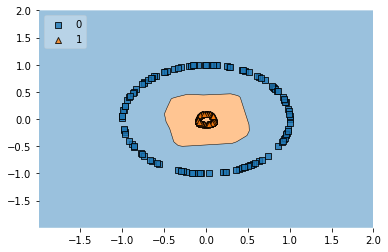

In [42]:
# Plot decision boundary
plot_decision_regions(X_test, y_test, clf=model, legend=2)
plt.show()

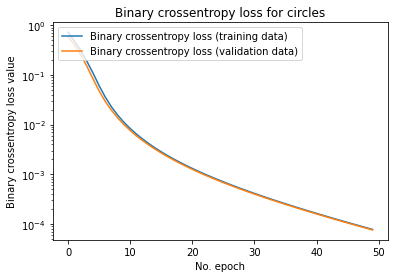

In [43]:
# Visualize training process
plt.plot(history.history['loss'], label='Binary crossentropy loss (training data)')
plt.plot(history.history['val_loss'], label='Binary crossentropy loss (validation data)')
plt.title('Binary crossentropy loss for circles')
plt.ylabel('Binary crossentropy loss value')
plt.yscale('log')
plt.xlabel('No. epoch')
plt.legend(loc="upper left");

-------------------------------------------------
#### Categorical crossentropy Keras model
---------------------------

Instead of `make_circles`, we’ll use `make_blobs` here – it allows us to make clusters of data instead of to draw two circles. 

Additionally, we import `to_categorical from keras.utils`, which ensures that we can convert our integer targets into categorical format.

In [44]:
# Configuration options
num_samples_total = 1000
training_split    = 250

cluster_centers = [(15,0), (15,15), (0,15), (30,15)]
num_classes     = len(cluster_centers)

num_classes

4

In [45]:
from sklearn.datasets import make_blobs

In [46]:
# Generate data
X, y = make_blobs(n_samples   = num_samples_total, 
                  centers     = cluster_centers, 
                  n_features  = num_classes, 
                  center_box  = (0, 1), 
                  cluster_std = 1.5)

In [53]:
y[:10]

array([2, 0, 3, 1, 2, 2, 3, 3, 0, 1])

In [48]:
from tensorflow.keras.utils import to_categorical

In [54]:
y_categorical = to_categorical(y)

X_train = X[training_split:, :]
X_test  = X[:training_split, :]

In [55]:
y_train = y_categorical[training_split:]
y_test  = y_categorical[:training_split].astype(np.int32)

In [57]:
y_train[:10]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [58]:
# Set shape based on data
feature_vector_length = len(X_train[0])
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (2,)


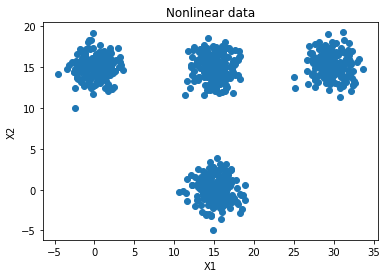

In [59]:
# Generate scatter plot for training data
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Nonlinear data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### Model architecture & configuration

In [60]:
# Create the model
model = Sequential()
model.add(Dense(12, 
                input_shape=input_shape, 
                activation='relu', 
                kernel_initializer='he_uniform'))

model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(num_classes, activation='linear'))

- contrary to the `binary` case, `categorical crossentropy` produces a multiclass probability distribution, or the relative likelihood that the sample belongs to any of the classes

- Hence, we must:

    - Find an `activation` function that supports this. 
        - The `Sigmoid` function generates an integer value between zero and one, which is no multiclass probability distribution. 
            - the `Softmax` activation function is capable of this. 
                - However, it’s built into `CategoricalCrossentropy` loss if `from_logits = True`, 
                    - this is expected to be more `numerically stable`. 
                        - That’s why we `activate linearly` here and set `from_logits` to `True` into our loss definition above.
    - Change the number of output neurons. Remember, we don’t generate an integer target anymore, but instead a list of probabilities, one per class in the ML problem. Hence, you’ll need num_classes neurons to generate the predictions by means of Softmax; in our case, that’s 4 neurons.

In [61]:
loss_function_used = tf.keras.losses.CategoricalCrossentropy(from_logits=True)           # default is from_logits=False,

In [62]:
loss_function_used.get_config()

{'reduction': 'auto',
 'name': 'categorical_crossentropy',
 'from_logits': True,
 'label_smoothing': 0.0,
 'axis': -1}

In [63]:
%%time
# Configure the model and start training
model.compile(loss     = loss_function_used, 
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics  = ['accuracy'])

history = model.fit(X_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=5, 
                    verbose=0, 
                    validation_split=0.2)

Wall time: 7.43 s


In [64]:
# Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

8/8 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Test results - Loss: 0.00264413352124393 - Accuracy: 100.0%


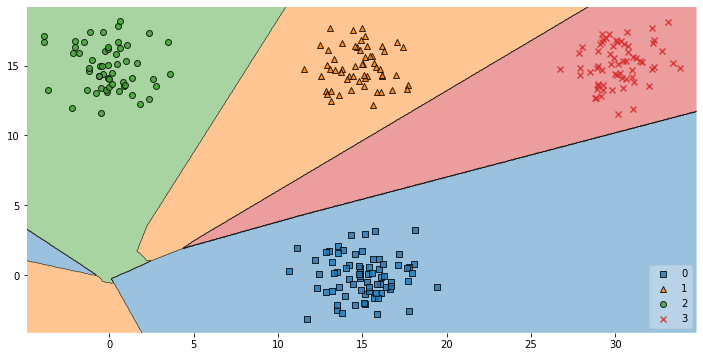

In [98]:
'''
  The Onehot2Int class is used to adapt the model so that it generates non-categorical data.
  This is required by the `plot_decision_regions` function.
  The code is courtesy of dr. Sebastian Raschka at https://github.com/rasbt/mlxtend/issues/607.
  Copyright (c) 2014-2016, Sebastian Raschka. 
  All rights reserved. Mlxtend is licensed as https://github.com/rasbt/mlxtend/blob/master/LICENSE-BSD3.txt.
  Thanks!
'''
# No hot encoding version
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

# fit keras_model
keras_model_no_ohe = Onehot2Int(model)

# Plot decision boundary
plt.figure(figsize=(12, 6))
plot_decision_regions(X_test, np.argmax(y_test, axis=1), clf=keras_model_no_ohe, legend=4);

------------------------------------
#### dissecting Keras’ implementation of BCE
---------------------------------

In [32]:
def binary_crossentropy(target, output, from_logits=False):
    """Binary crossentropy between an output tensor and a target tensor.
    # Arguments
        target: A tensor with the same shape as `output`.
        output: A tensor.
        from_logits: Whether `output` is expected to be a logits tensor.
            By default, we consider that `output`
            encodes a probability distribution.
    # Returns
        A tensor.
    """
    # Note: tf.nn.sigmoid_cross_entropy_with_logits expects logits, Keras expects probabilities.
    if not from_logits:                      # from_logits = False, means output is prob
        # transform back to logits
        _epsilon = _to_tensor(epsilon(), output.dtype.base_dtype)
        
        output = tf.clip_by_value(output, _epsilon, 1 - _epsilon)
        output = tf.log(output / (1 - output))

    return tf.nn.sigmoid_cross_entropy_with_logits(labels=target,
                                                   logits=output)

- So, input argument `output` is clipped first, 
    - then converted to logits, and 
        - then fed into TensorFlow function tf.nn.sigmoid_cross_entropy_with_logits. 
        
- In mathematics, the `logit` function is the `inverse` of the `sigmoid` function, so in theory `logit(sigmoid(x)) = x`.

In [33]:
from IPython.display import Image

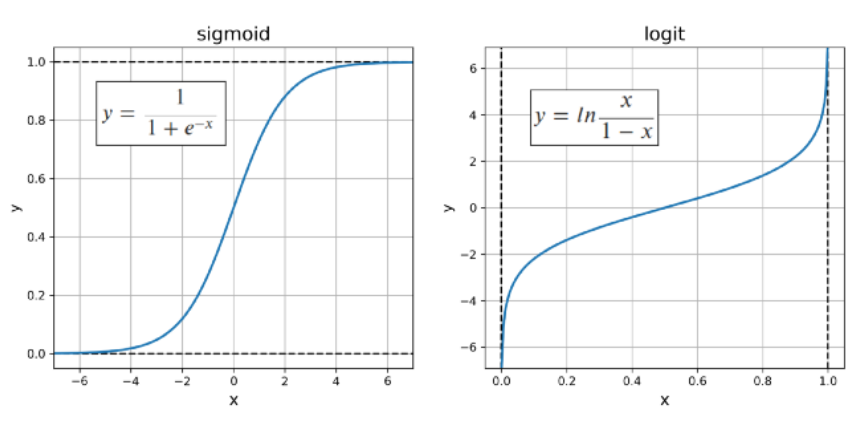

In [34]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\keras-loss-function-00.PNG', width=600)

- In Deep Learning, `logits` usually and unfortunately means the `raw` outputs of the last layer of a classification network, that is, the output of the layer before it is passed to an `activation/normalization` function, e.g. the `sigmoid`. 

- Raw outputs may take on any value. 

- This is what `sigmoid_cross_entropy_with_logits`, the core of Keras’s binary_crossentropy, expects. 

- In Keras, by contrast, the expectation is that the values in variable output represent probabilities and are therefore bounded by [0 1] 
    - that’s why `from_logits` is by default set to False. 
        - So, they need to be converted back to raw values before being fed into `sigmoid_cross_entropy_with_logits`.